<a href="https://colab.research.google.com/github/MinJi12345678/Source-Code/blob/main/24_03_22_%EA%B9%80%EB%AF%BC%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2023년 2월 15일 데이터

한글 폰트 설치

In [3]:
# Linux Package Installation
!apt-get -qq -y install fonts-nanum > /dev/null

# Delete Cache
!rm -rf ~/.cache/matplotlib -rf

In [ ]:
import os

os.kill(os.getpid(), 9)

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 마이너스 폰트 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 전역폰트 지정
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
import warnings
warnings.filterwarnings('ignore')

1) 데이터 읽어오기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
url = '/content/drive/MyDrive/5조/03. 데이터/패션 데이터/230215.csv'
df = pd.read_csv(url)

2) .head()

In [5]:
df.head(3)

,category_large_desc,category_middle_desc,category_small_desc,item,color,use,material,print_pattern,characteristic,detail,age,weight,season,sensibility,sale_price,recent_sale_count
0,여성복,원피스,점프슈트,바람막이/반바지/여름점프수트/반팔점프수트/반바지점프수트/점프수트,베이지/블랙,NaN,코튼/폴리에스터/스판/나일론,체크,NaN,NaN,NaN,NaN,NaN,NaN,28800,0
1,여성복,원피스,점프슈트,점프수트/오버롤팬츠/데님점프수트/데일리점프수트,NaN,NaN,데님/코튼/폴리에스터/나일론,체크,빈티지,스트링/오버롤/자수/워싱,NaN,NaN,NaN,레이어드/귀여운,28800,0
2,여성복,원피스,점프슈트,포켓점프수트/점프수트/데님점프수트/데일리점프수트,NaN,NaN,데님/코튼/폴리에스터/나일론,NaN,NaN,스트링/오버롤,NaN,NaN,NaN,귀여운,28800,0


3) .info()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858215 entries, 0 to 858214
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   category_large_desc   858215 non-null  object
 1   category_middle_desc  858215 non-null  object
 2   category_small_desc   858215 non-null  object
 3   item                  676959 non-null  object
 4   color                 711970 non-null  object
 5   use                   242476 non-null  object
 6   material              755054 non-null  object
 7   print_pattern         368166 non-null  object
 8   characteristic        547034 non-null  object
 9   detail                589722 non-null  object
 10  age                   3784 non-null    object
 11  weight                41831 non-null   object
 12  season                830 non-null     object
 13  sensibility           603684 non-null  object
 14  sale_price            858215 non-null  int64 
 15  recent_sale_count

4) 결측치 확인

In [7]:
df.isnull().sum(axis = 0)

category_large_desc          0
category_middle_desc         0
category_small_desc          0
item                    181256
color                   146245
use                     615739
material                103161
print_pattern           490049
characteristic          311181
detail                  268493
age                     854431
weight                  816384
season                  857385
sensibility             254531
sale_price                   0
recent_sale_count            0
dtype: int64

#1. 데이터 복사

In [8]:
df1 = df.copy()

1) 필요없는 데이터 삭제

필요없는 데이터 확인

In [9]:
df1.iloc[:,-9:-2]

,print_pattern,characteristic,detail,age,weight,season,sensibility
0,체크,NaN,NaN,NaN,NaN,NaN,NaN
1,체크,빈티지,스트링/오버롤/자수/워싱,NaN,NaN,NaN,레이어드/귀여운
2,NaN,NaN,스트링/오버롤,NaN,NaN,NaN,귀여운
3,체크,NaN,루즈핏/스트링,NaN,NaN,NaN,활동적인
4,별,시원한,루즈핏/슬림핏/스트링/커팅,NaN,NaN,NaN,캐주얼한
...,...,...,...,...,...,...,...
858210,스트라이프,NaN,밴딩/맥시/머메이드,NaN,NaN,NaN,NaN
858211,별,시원한,밴딩/플리츠,NaN,NaN,NaN,NaN
858212,플로랄/,빈티지/부드러운,밴딩/플레어,NaN,NaN,NaN,빈티지한/페미닌한
858213,NaN,NaN,밴딩/플리츠/캉캉,NaN,NaN,NaN,멋스러운


2) 불필요 데이터 삭제

In [10]:
df1.drop(df1.columns[-9:-2], axis=1, inplace=True)

.head()

In [11]:
df1.head(3)

,category_large_desc,category_middle_desc,category_small_desc,item,color,use,material,sale_price,recent_sale_count
0,여성복,원피스,점프슈트,바람막이/반바지/여름점프수트/반팔점프수트/반바지점프수트/점프수트,베이지/블랙,NaN,코튼/폴리에스터/스판/나일론,28800,0
1,여성복,원피스,점프슈트,점프수트/오버롤팬츠/데님점프수트/데일리점프수트,NaN,NaN,데님/코튼/폴리에스터/나일론,28800,0
2,여성복,원피스,점프슈트,포켓점프수트/점프수트/데님점프수트/데일리점프수트,NaN,NaN,데님/코튼/폴리에스터/나일론,28800,0


.info()

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858215 entries, 0 to 858214
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   category_large_desc   858215 non-null  object
 1   category_middle_desc  858215 non-null  object
 2   category_small_desc   858215 non-null  object
 3   item                  676959 non-null  object
 4   color                 711970 non-null  object
 5   use                   242476 non-null  object
 6   material              755054 non-null  object
 7   sale_price            858215 non-null  int64 
 8   recent_sale_count     858215 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 58.9+ MB


불필요 데이터 삭제(category_large_desc, category_middle_desc, color, use)

In [13]:
df1 = df1.drop(df1.columns[[0, 1, 4, 5]], axis=1)

.head()

In [14]:
df1.head(3)

,category_small_desc,item,material,sale_price,recent_sale_count
0,점프슈트,바람막이/반바지/여름점프수트/반팔점프수트/반바지점프수트/점프수트,코튼/폴리에스터/스판/나일론,28800,0
1,점프슈트,점프수트/오버롤팬츠/데님점프수트/데일리점프수트,데님/코튼/폴리에스터/나일론,28800,0
2,점프슈트,포켓점프수트/점프수트/데님점프수트/데일리점프수트,데님/코튼/폴리에스터/나일론,28800,0


3) 결측치 제거

In [15]:
df1.dropna(axis = 0, inplace = True)

4) 결측치 확인

In [16]:
df1.isnull().sum(axis = 0)

category_small_desc    0
item                   0
material               0
sale_price             0
recent_sale_count      0
dtype: int64

5) .info()

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616269 entries, 0 to 858214
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   category_small_desc  616269 non-null  object
 1   item                 616269 non-null  object
 2   material             616269 non-null  object
 3   sale_price           616269 non-null  int64 
 4   recent_sale_count    616269 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 28.2+ MB


6) .head()

In [18]:
df1.head(10)

,category_small_desc,item,material,sale_price,recent_sale_count
0,점프슈트,바람막이/반바지/여름점프수트/반팔점프수트/반바지점프수트/점프수트,코튼/폴리에스터/스판/나일론,28800,0
1,점프슈트,점프수트/오버롤팬츠/데님점프수트/데일리점프수트,데님/코튼/폴리에스터/나일론,28800,0
2,점프슈트,포켓점프수트/점프수트/데님점프수트/데일리점프수트,데님/코튼/폴리에스터/나일론,28800,0
3,점프슈트,스트링점프수트/반팔점프수트/반바지/반바지점프수트/점프수트/칼라점프슈트/데일리점프수트,폴리에스터/아크릴/나일론,35800,0
6,점프슈트,오버롤데님/여름점프수트/오버롤팬츠/데님점프수트/점프수트,데님,28500,0
7,점프슈트,오버롤팬츠/점프수트/여름점프수트,텐셀/데님,29430,1
8,점프슈트,바캉스룩원피스,폴리에스터,13900,0
10,점프슈트,점프수트/반바지점프수트/반바지,코튼,33800,0
11,점프슈트,점프수트,코튼,25800,0
12,점프슈트,점프수트/나시점프수트,코튼,28800,0


7) recent_sale_count >= 1 인 데이터 구하기

In [19]:
df2 = df1[df1['recent_sale_count'] >= 1]

8) .head() recent_sale_count 확인

In [20]:
df2.head()

,category_small_desc,item,material,sale_price,recent_sale_count
7,점프슈트,오버롤팬츠/점프수트/여름점프수트,텐셀/데님,29430,1
19,점프슈트,스트링점프수트/반바지/반바지점프수트/점프수트/캐주얼점프수트/데일리점프수트,나일론,28800,2
20,점프슈트,점프수트/포켓점프수트/오버롤팬츠/데님점프수트,코튼,28800,4
24,점프슈트,반바지,데님,11900,1
28,점프슈트,와이드점프수트/점프수트/뷔스티에점프수트/나시점프수트,코튼/폴리에스터/쉬폰/나일론,15800,1


9) .info()

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11404 entries, 7 to 858193
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category_small_desc  11404 non-null  object
 1   item                 11404 non-null  object
 2   material             11404 non-null  object
 3   sale_price           11404 non-null  int64 
 4   recent_sale_count    11404 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 534.6+ KB


10) 	category_small_desc 오름차순 정리 .head()

In [43]:
df2.sort_values(by = 'category_small_desc', ascending = True).head(10)

,category_small_desc,item,material,sale_price,recent_sale_count
791582,H라인스커트,니트스커트/울스커트/체크스커트/데일리스커트/미니스커트/겨울스커트,아크릴,10900,1
791732,H라인스커트,랩스커트/셔링스커트/미니스커트/하이웨이스트스커트,폴리에스터/스판,25900,1
791736,H라인스커트,H라인스커트/코듀로이스커트/슬릿스커트/라인스커트,코튼,36500,1
791737,H라인스커트,울스커트/겨울스커트,코튼,38900,2
791738,H라인스커트,가을스커트/하이웨이스트스커트/정장스커트,실크/폴리에스터/스판/레이온,30500,1
791748,H라인스커트,가을스커트/스웨이드스커트/하객룩스커트/슬릿스커트,폴리에스터/스판,21900,1
791795,H라인스커트,H라인스커트/울스커트/미니스커트/겨울스커트,폴리에스터/울/나일론,30000,1
791796,H라인스커트,라인스커트/H라인스커트/미디스커트/슬릿스커트/하이웨이스트스커트,실크/폴리에스터/스판/레이온,54400,1
791801,H라인스커트,롱스커트/라인스커트/H라인스커트/절개스커트/슬릿스커트/베이식스커트/밴딩스커트,폴리에스터/스판/코튼,21800,1
791807,H라인스커트,라인스커트/H라인스커트/미디스커트/코튼스커트/슬릿스커트/데님스커트,코튼,29900,1


11) 가장 많이 판매 된 물품

In [42]:
df2.sort_values(by = 'recent_sale_count', ascending = False).head(10)

,category_small_desc,item,material,sale_price,recent_sale_count
817216,플리츠스커트,플리츠스커트,나일론,61800,389
600027,티셔츠,이너나시/데일리나시/나시티셔츠,폴리에스터,9900,218
586977,블라우스/셔츠,베이식블라우스,폴리에스터/코튼,24800,178
433346,니트,이너티셔츠/라운드니트/베이식티셔츠/브이넥니트/가을니트/캐시미어니트/니트티셔츠/데일리...,폴리에스터/울/레이온,17500,173
854978,롱스커트,롱스커트/라인스커트/H라인스커트/데님스커트/데님롱스커트,코튼,17900,165
740244,티셔츠,크롭티셔츠/슬림티셔츠/로고티셔츠/크롭탑,코튼,14900,156
364418,자켓,크롭재킷/칼라재킷/트위드재킷/노칼라재킷,폴리에스터/울,36900,142
446161,니트,라운드니트/크롭니트/루즈핏니트/꽈배기니트/봄니트,아크릴,13900,116
857781,롱스커트,롱스커트/레이스스커트/망사스커트/밴딩스커트/플레어스커트,폴리에스터,15800,115
523656,티셔츠,이너티셔츠/베이식티셔츠/남녀공용티셔츠/롱티셔츠/슬릿티셔츠/시보리카디건/코튼티셔츠,코튼,21600,110


In [44]:
df2.sort_values(by = 'recent_sale_count', ascending = True).head(10)

,category_small_desc,item,material,sale_price,recent_sale_count
7,점프슈트,오버롤팬츠/점프수트/여름점프수트,텐셀/데님,29430,1
559996,티셔츠,커플티셔츠/로고티셔츠/오버핏티셔츠/스트릿티셔츠,코튼,15900,1
559797,티셔츠,여름티셔츠/배색티셔츠/캐주얼티셔츠/프린트티셔츠/레터링티셔츠,코튼/폴리에스터/스판/나일론,19800,1
559436,티셔츠,롱티셔츠/프린트맨투맨/루스핏티셔츠/오버핏맨투맨/루즈핏맨투맨/맨투맨,코튼,14900,1
558982,니트,라운드니트/캐주얼니트/데일리니트/스트라이프니트/베이식니트,폴리에스터/아크릴,23800,1
558906,티셔츠,가을티셔츠/슬림티셔츠/시스루티셔츠/데일리티셔츠,실크/폴리에스터/스판/레이온,15400,1
558852,티셔츠,컬러풀티셔츠/스트라이프티셔츠,폴리에스터/코튼,18800,1
558826,티셔츠,스트라이프티셔츠/배색티셔츠/봄티셔츠,코튼,22000,1
558810,블라우스/셔츠,볼륨소매티/티셔츠블라우스/화이트블라우스/퍼프소매티셔츠/겨울블라우스/오피스룩블라우스/...,폴리에스터/코튼,25000,1
558803,블라우스/셔츠,오버핏셔츠,폴리에스터/스판/나일론,29900,1


12) unique() 유일값

In [24]:
df2['category_small_desc'].unique()

array(['점프슈트', '쉬폰원피스', '셔츠원피스', '랩원피스', '데님원피스', '플리츠원피스', '리넨원피스',
       '스퀘어넥원피스', '롱원피스', '니트원피스', '트위드원피스', '뷔스티에원피스', '미니원피스', '데님팬츠',
       '조거팬츠', '코듀로이팬츠', '반바지', '면바지', '슬랙스', '자켓', '카디건', '코트', '점퍼',
       '블라우스/셔츠', '티셔츠', '니트', '뷔스티에/베스트', '플리츠스커트', '플레어스커트', '머메이드스커트',
       'H라인스커트', '미니스커트', '롱스커트', '데님스커트'], dtype=object)

13) 빈도분석

In [25]:
df1['category_small_desc'].value_counts()

티셔츠         121099
롱원피스         85131
니트           72483
블라우스/셔츠      70222
자켓           46554
카디건          37051
면바지          35465
롱스커트         31627
점퍼           21565
미니원피스        17460
뷔스티에/베스트     12972
반바지          12553
코트           11684
플레어스커트        8705
H라인스커트        7661
점프슈트          5155
조거팬츠          3535
플리츠스커트        3205
데님팬츠          2303
코듀로이팬츠        1950
니트원피스         1099
리넨원피스         1048
미니스커트         1019
플리츠원피스         876
스퀘어넥원피스        714
머메이드스커트        663
트위드원피스         643
데님스커트          511
뷔스티에원피스        441
랩원피스           335
슬랙스            243
셔츠원피스          162
쉬폰원피스           83
데님원피스           52
Name: category_small_desc, dtype: int64

14) '의류'별 '판매량' 합

In [26]:
pd.pivot_table(df2,
               index = ['category_small_desc'],
               values = ['recent_sale_count'],
               aggfunc = 'sum')

,recent_sale_count
category_small_desc,
H라인스커트,222
니트,4082
니트원피스,75
데님스커트,9
데님원피스,8
데님팬츠,447
랩원피스,5
롱스커트,2111
롱원피스,2763


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

#2. 시각화

1) 의류별 판매량

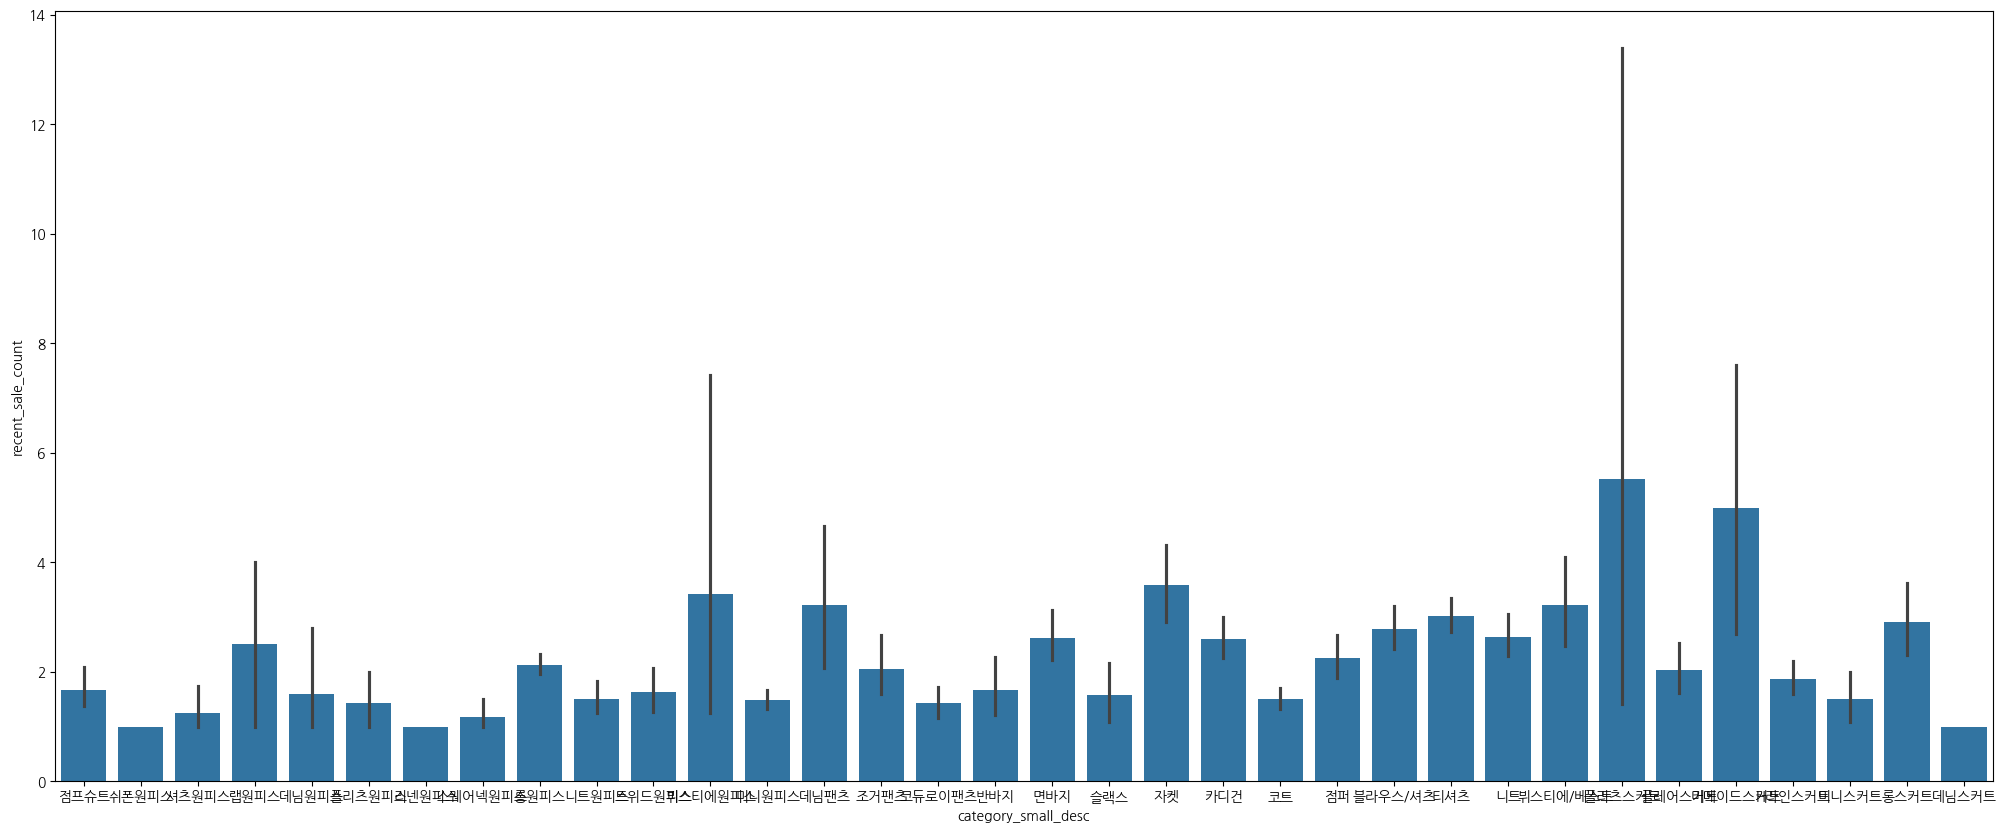

In [41]:
plt.figure(figsize = (25, 10))
sns.barplot(data = df2,
            x = 'category_small_desc',
            y = 'recent_sale_count');

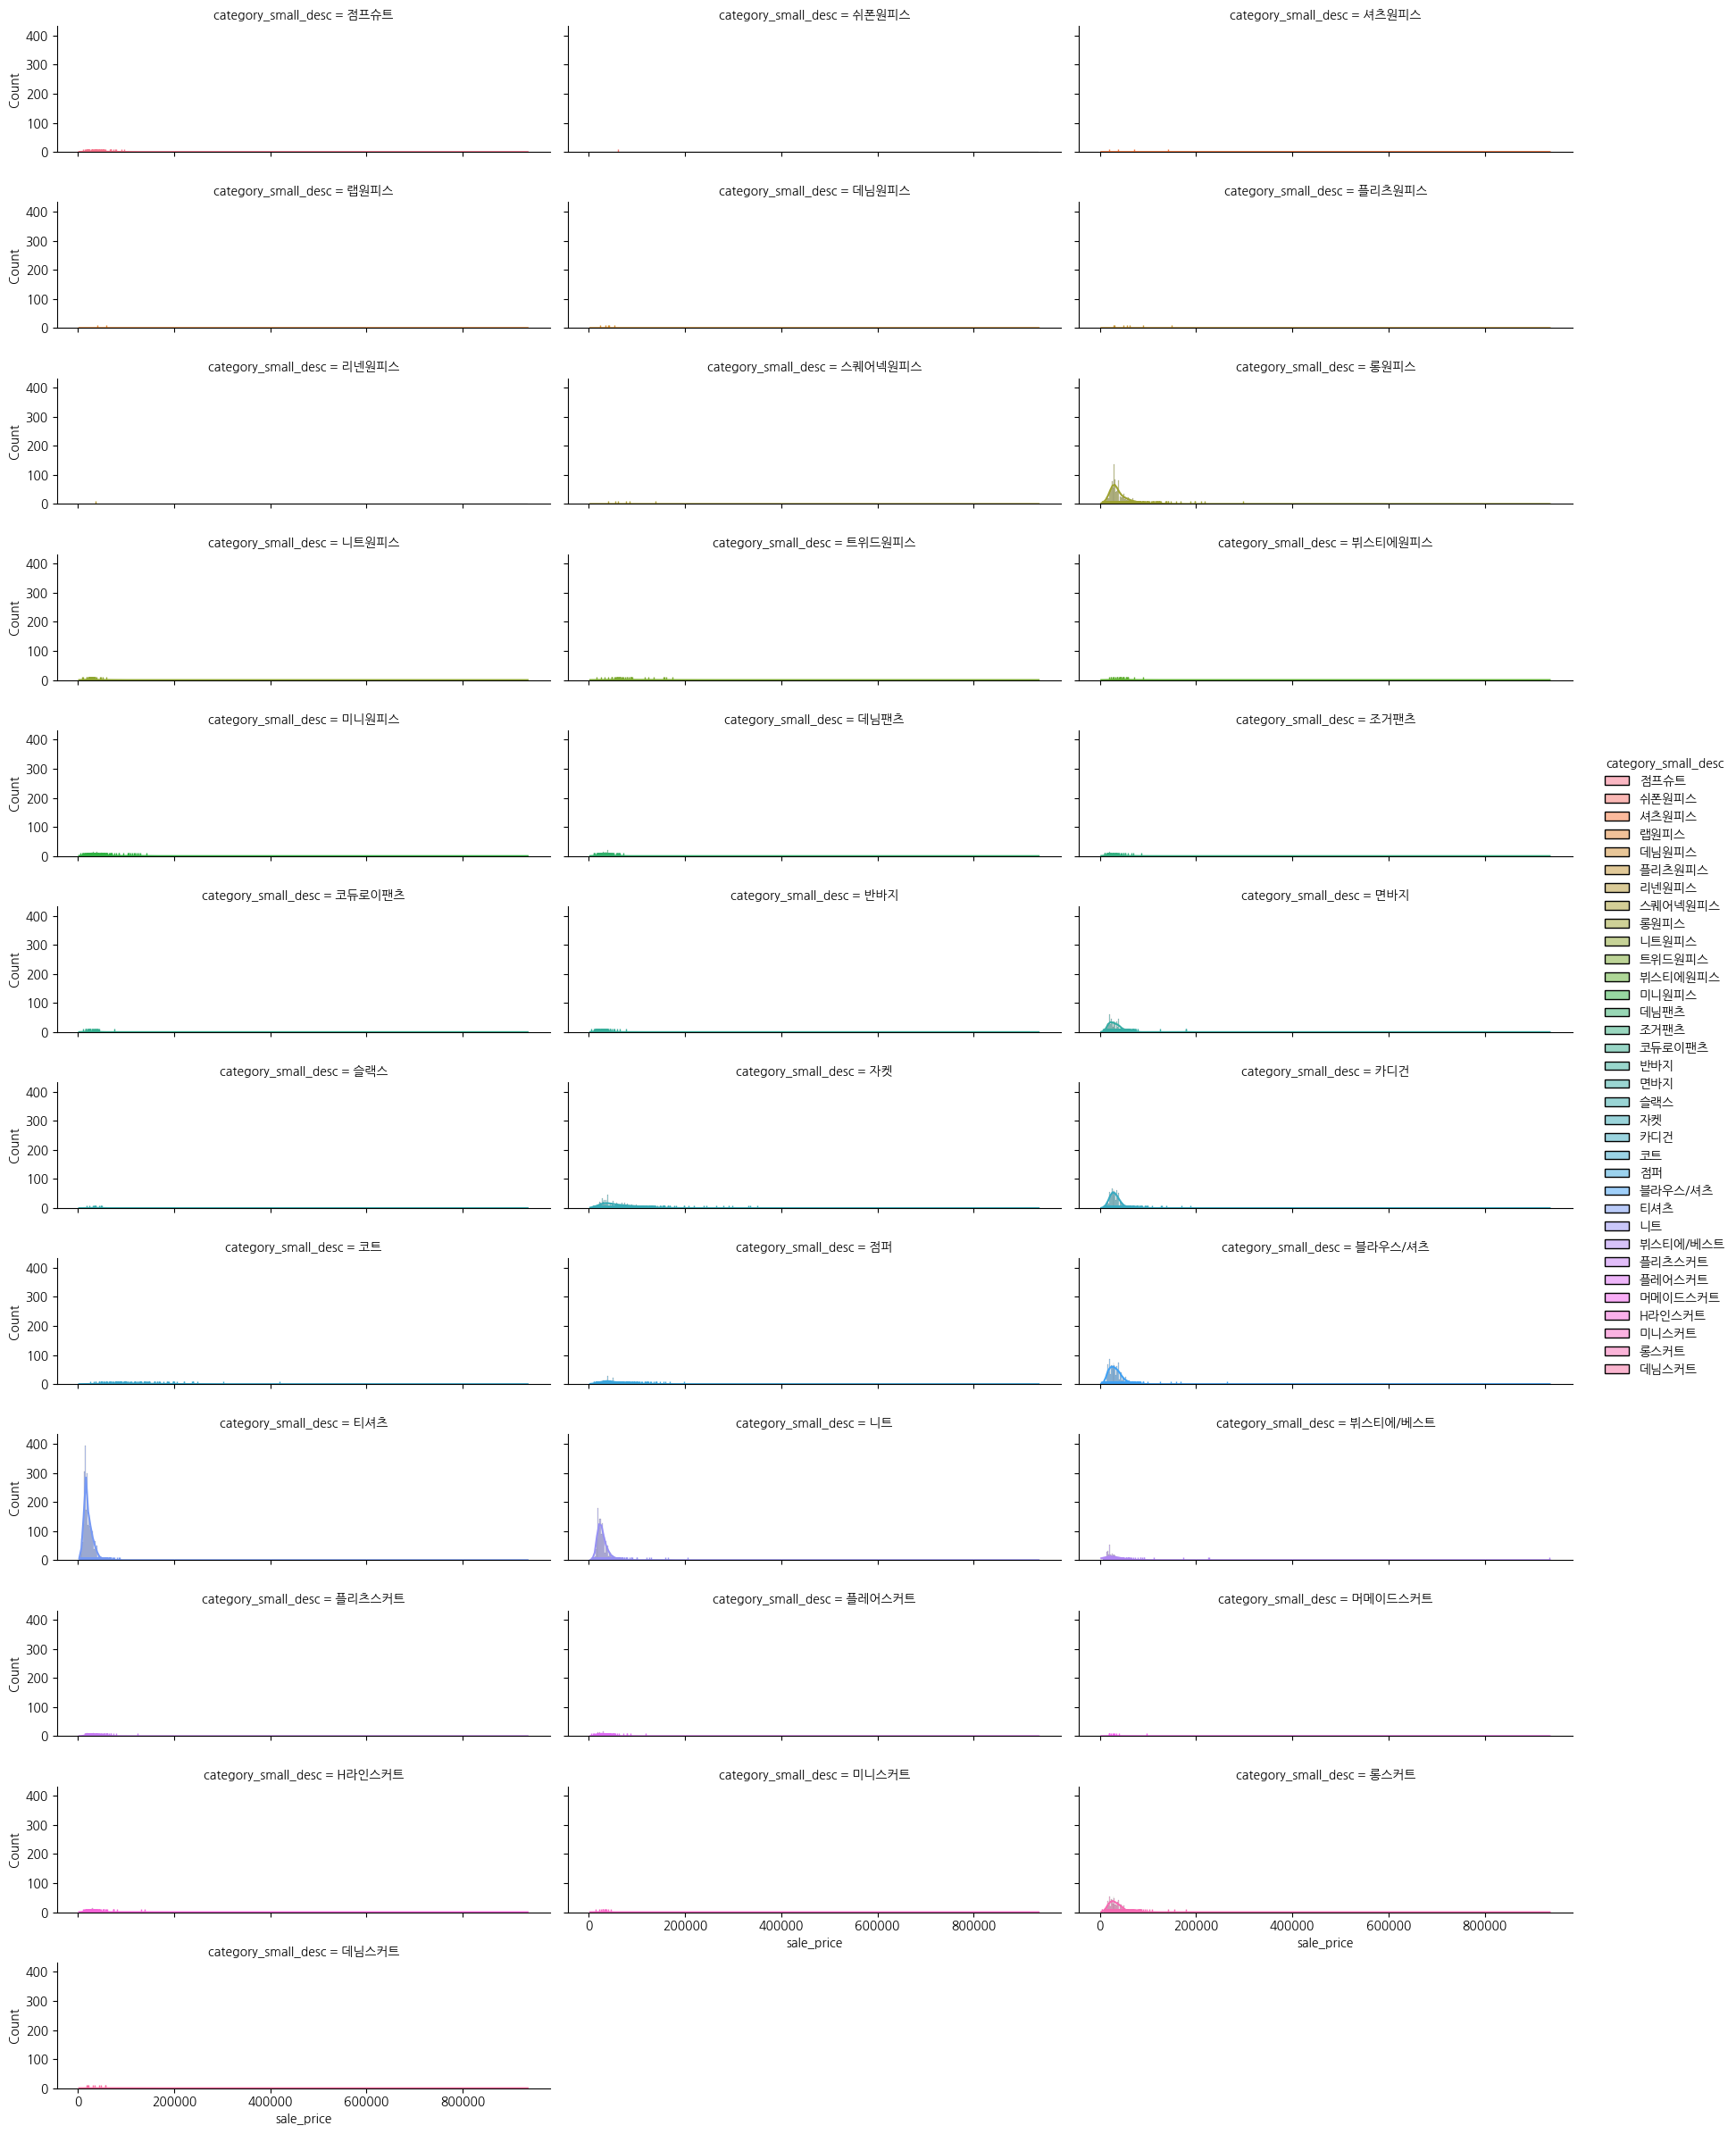

In [39]:
sns.displot(data=df2,
            x = 'sale_price',
            kde = True,
            rug = True,
            hue = 'category_small_desc',
            col = 'category_small_desc',
            col_wrap = 3,
            height = 2,
            aspect = 3);